In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
# making dataframe
df1 = pd.read_csv("ayaz_perf_microbenchmarks.csv")
X = df1["Benchmark"]
Y1 = df1["IPC"]
Y2 = df1["Cycles"]
Y3 = df1["Instructions"]

df2 = pd.read_csv("ayaz_gem5_microbenchmarks.csv")
X_2 = df2["Benchmark"]
Y1_2 = df2["IPC"]
Y2_2 = df2["Cycles"]
Y3_2 = df2["Instructions"]

In [3]:
with open("statsdump.csv", "w") as csvfile:
    filewriter = csv.writer(
        csvfile, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL
    )
    filewriter.writerow(["perf", "gem5", "% difference"])
    csvfile.close()

In [4]:
def plot(stat):
    i = 0
    j = 0

    for b, bench in enumerate(X):
        plt.bar(i - 0.1, float(df1[stat].iloc[b]), 0.2, color="C" + str(j))
        j = int(not j)
        plt.bar(i + 0.1, float(df2[stat].iloc[b]), 0.2, color="C" + str(j))
        j = int(not j)
        i = i + 1
        diff = (100 * (df2[stat].iloc[b] - df1[stat].iloc[b])) / (df2[stat].iloc[b])
        with open("statsdump.csv", "a") as csvfile:
            filewriter = csv.writer(
                csvfile, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL
            )
            filewriter.writerow([df1[stat].iloc[b], df2[stat].iloc[b], diff])
            csvfile.close()

    for i, pfrm in enumerate(["perf", "gem5"]):
        plt.bar(0, 0, color="C" + str(i), label=pfrm)

    plt.xticks((np.arange(len(X))), X, rotation=80, ha="center", fontsize=11)

    plt.xlabel("Benchmarks")
    plt.ylabel(stat)
    plt.title("Benchmark vs. " + stat)
    plt.legend()
    plt.rcParams["figure.figsize"]=20,10
    plt.show()

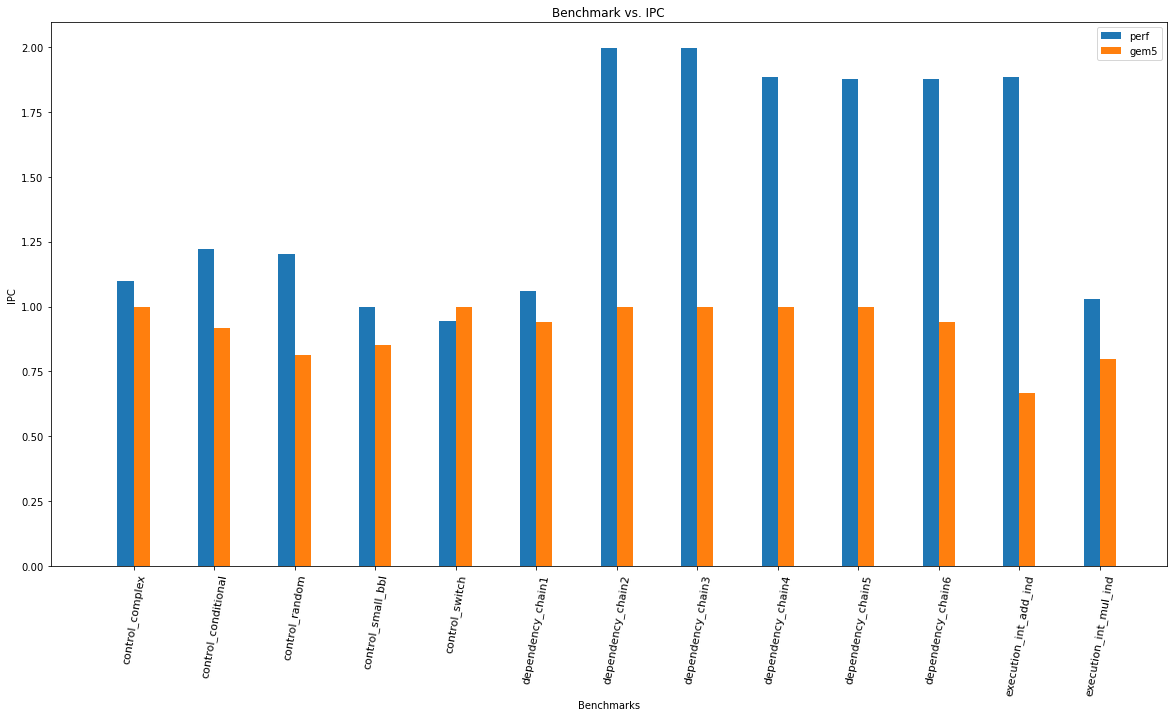

In [8]:
plot("IPC")

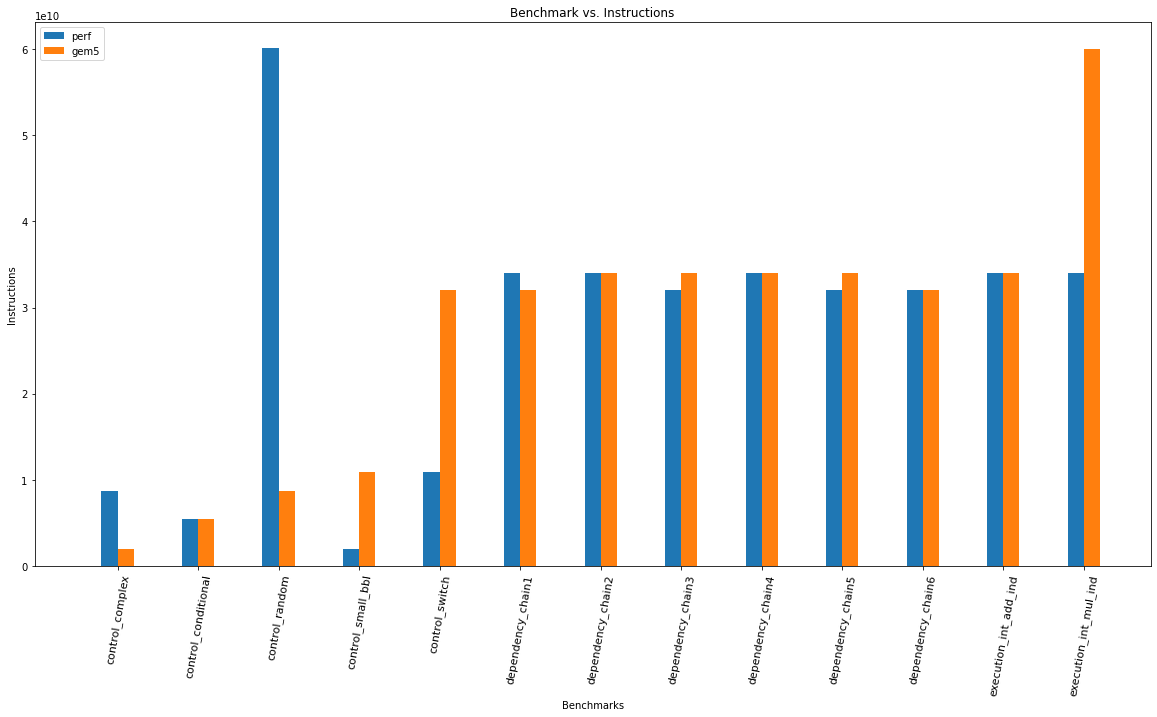

In [6]:
plot("Instructions")

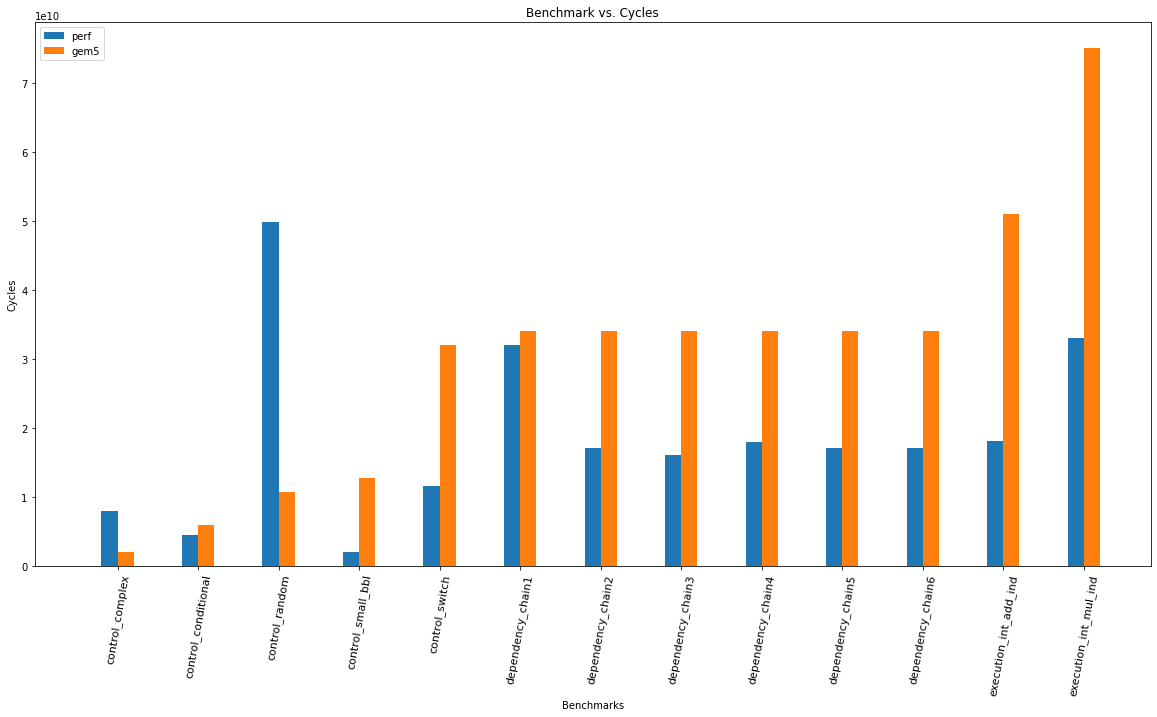

In [7]:
plot("Cycles")